In [2]:
!pip install pydataset

In [32]:
from pydataset import data
import seaborn as sns
import pandas as pd
from scipy.stats import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [6]:
cw = data('chickwts')
cw.head()

,weight,feed
1,179,horsebean
2,160,horsebean
3,136,horsebean
4,227,horsebean
5,217,horsebean


In [9]:
cw.nunique()

weight    66
feed       6
dtype: int64

In [8]:
cw.groupby('feed').count()

,weight
feed,
casein,12
horsebean,10
linseed,12
meatmeal,11
soybean,14
sunflower,12


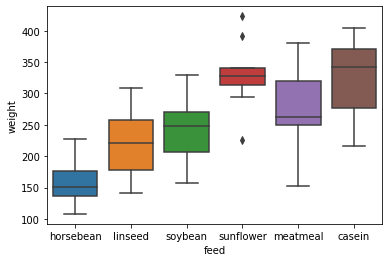

In [11]:
ax = sns.boxplot(data=cw,x="feed",y="weight")

## Is weight differ by the type of food ?

In [16]:
c = pd.get_dummies(data=cw,columns=['feed'])
c.head()

,weight,feed_casein,feed_horsebean,feed_linseed,feed_meatmeal,feed_soybean,feed_sunflower
1,179,0,1,0,0,0,0
2,160,0,1,0,0,0,0
3,136,0,1,0,0,0,0
4,227,0,1,0,0,0,0
5,217,0,1,0,0,0,0


In [31]:
weights = []
for col in c.columns[1:]:
    weights.append(c[c[col] == 1 ]['weight'])

stats.f_oneway(weights[0],weights[1],weights[2],weights[3],weights[4],weights[5])

F_onewayResult(statistic=15.364799774712534, pvalue=5.936419853471331e-10)

In [34]:
pairwise_tukeyhsd(c['weight'],cw['feed'],alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
casein,horsebean,-163.3833,0.001,-232.3445,-94.4222,True
casein,linseed,-104.8333,0.001,-170.5852,-39.0814,True
casein,meatmeal,-46.6742,0.3324,-113.9039,20.5554,False
casein,soybean,-77.1548,0.0084,-140.5149,-13.7947,True
casein,sunflower,5.3333,0.9,-60.4186,71.0852,False
horsebean,linseed,58.55,0.1412,-10.4112,127.5112,False
horsebean,meatmeal,116.7091,0.001,46.3375,187.0806,True
horsebean,soybean,86.2286,0.0042,19.544,152.9132,True
horsebean,sunflower,168.7167,0.001,99.7555,237.6778,True
linseed,meatmeal,58.1591,0.1274,-9.0705,125.3887,False
